In [50]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline

In [52]:
# Bilinear interpolation function
def bilinear_interpolate_numpy(im, x, y):
    height, width = im.shape

    x0 = np.floor(x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y).astype(int)
    y1 = y0 + 1

    x0 = np.clip(x0, 0, width-1)
    x1 = np.clip(x1, 0, width-1)
    y0 = np.clip(y0, 0, height-1)
    y1 = np.clip(y1, 0, height-1)

    Ia = im[ y0, x0 ]
    Ib = im[ y1, x0 ]
    Ic = im[ y0, x1 ]
    Id = im[ y1, x1 ]

    wa = (x1-x) * (y1-y)
    wb = (x1-x) * (y-y0)
    wc = (x-x0) * (y1-y)
    wd = (x-x0) * (y-y0)

    return wa*Ia + wb*Ib + wc*Ic + wd*Id

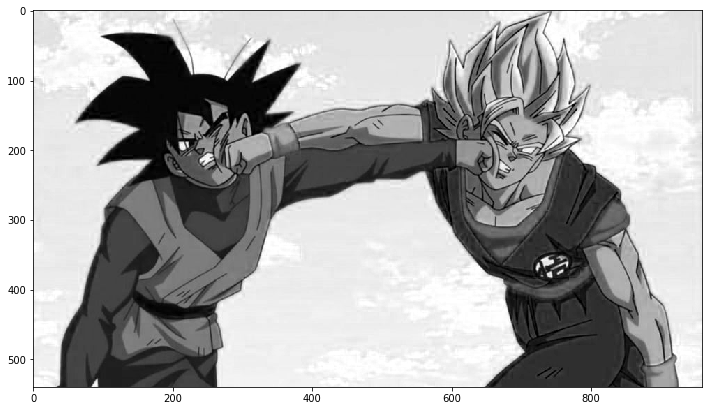

In [53]:
image = skimage.io.imread('images/dbz2.jpg')[:,:,2]
plt.figure(figsize=(10,10))
skimage.io.imshow(image)

In [54]:
height, width = image.shape
height, width

(540, 960)

In [55]:
identity = np.array([[1, 0, 0],
                     [0, 1, 0]])

translation = np.array([[1., 0., 0.5],
                        [0., 1., 0.]])

rotation = np.array([[0.707, -0.707, 0.],
                     [0.707, 0.707, 0.]])

In [56]:
# normalized 2d grid
x = np.linspace(0, 1, width)
y = np.linspace(0, 1, height)

xx, yy = np.meshgrid(x, y)

# convert to homogeneous coordinates
ones = np.ones(np.prod(xx.shape))
sampling_grid = np.vstack((xx.flatten(), yy.flatten(), ones))
print('Sampling Grid Shape :', sampling_grid.shape)

Sampling Grid Shape : (3, 518400)


In [57]:
transformed_grid = np.matmul(rotation, sampling_grid)
print('Transformed Grid Shape :', transformed_grid.shape)

Transformed Grid Shape : (2, 518400)


In [58]:
transformed_x = transformed_grid[0]
transformed_y = transformed_grid[1]

# Scale back to original
#transformed_x = ((transformed_x + 1.) * width) * 0.5
#transformed_y = ((transformed_y + 1.) * height) * 0.5

# reshape to 2d shape
transformed_x = transformed_x.reshape(height, width)
transformed_y = transformed_y.reshape(height, width)
print('Transformed Grid Shape :', transformed_x.shape)

Transformed Grid Shape : (540, 960)


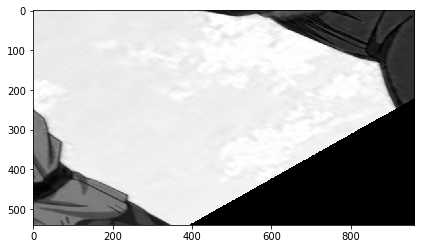

In [59]:
# Transform image
transformed_image = bilinear_interpolate_numpy(image, transformed_x, transformed_y)
transformed_image = transformed_image.astype(np.uint8)
skimage.io.imshow(transformed_image)